# **Exercício 09 - Keras**



**Definindo a lista de imagens a serem processadas pelo Keras**


In [0]:
image_list = [
  'http://farm2.static.flickr.com/1005/3352548105_f998b514ec.jpg',
  'http://farm4.static.flickr.com/3460/3273423088_4f84d31e46.jpg',
  'http://www.peatom.info/images/2008/08/11/pajaro.noticia.JPG',
  'http://static.flickr.com/3079/2297060484_797db096f7.jpg',
  'https://farm3.static.flickr.com/2210/2513104805_454636c343.jpg',
  'http://i303.photobucket.com/albums/nn132/tcy1227/DSCN0097.jpg',
  'https://farm2.static.flickr.com/1198/867715363_3a6bbbfe32.jpg',
]

**Importando as bibliotecas necessárias**

In [2]:
import numpy as np
import cv2
import urllib
from google.colab.patches import cv2_imshow
from io import BytesIO
from keras.preprocessing import image as image_utils
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras.applications import VGG16

Using TensorFlow backend.


**Laço para executar o modelo do Keras (VGG16) nas imagens**

1. orange: 70.43%
2. lemon: 24.22%
3. strawberry: 0.87%
4. goblet: 0.79%
5. beer_glass: 0.58%


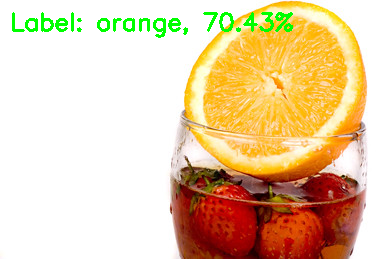

1. red_wine: 32.57%
2. cocktail_shaker: 27.50%
3. espresso: 5.14%
4. wine_bottle: 4.87%
5. saltshaker: 4.35%


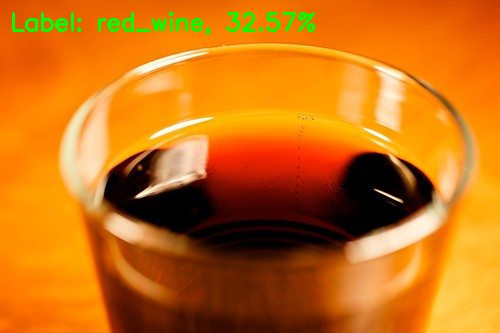

1. robin: 50.17%
2. jay: 23.34%
3. quail: 5.96%
4. bulbul: 3.31%
5. brambling: 2.61%


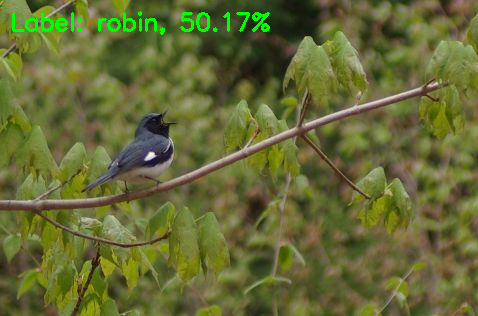

1. butcher_shop: 36.00%
2. grocery_store: 32.15%
3. crayfish: 8.05%
4. coral_fungus: 5.66%
5. sea_cucumber: 5.27%


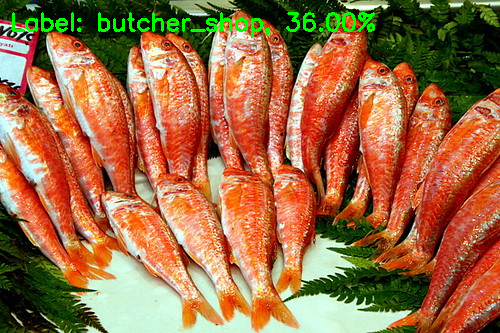

1. anemone_fish: 97.95%
2. sea_anemone: 0.87%
3. coral_reef: 0.45%
4. sea_slug: 0.38%
5. rock_beauty: 0.21%


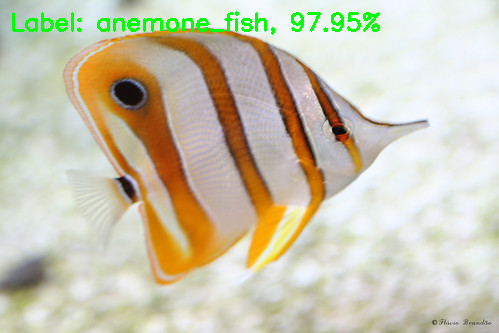

1. cucumber: 94.71%
2. zucchini: 2.48%
3. spaghetti_squash: 0.95%
4. acorn_squash: 0.55%
5. axolotl: 0.21%


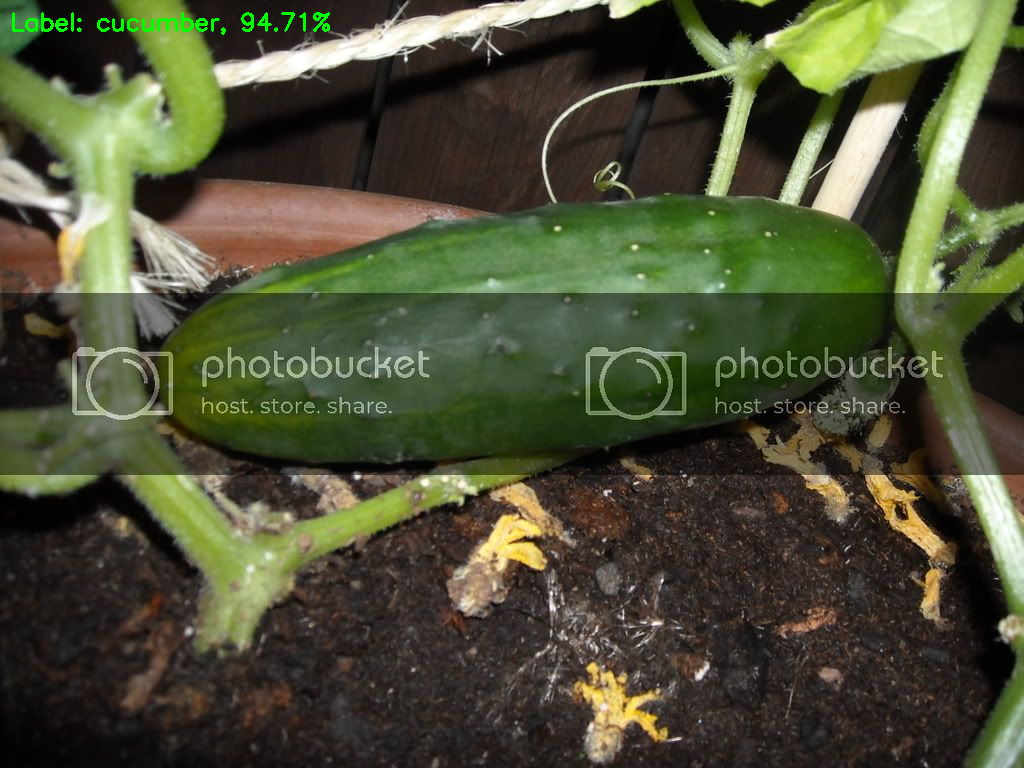

1. cucumber: 62.86%
2. corn: 11.46%
3. ear: 10.15%
4. strainer: 2.69%
5. lacewing: 2.60%


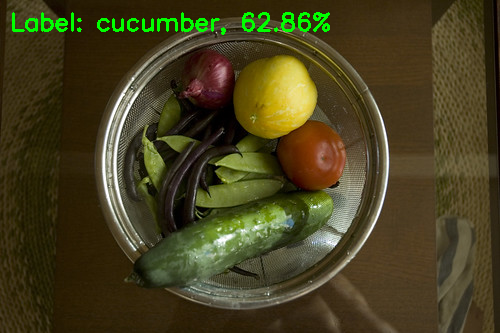

In [3]:
for image_url in image_list: # Laço para passar por cada imagem
    url = urllib.request.urlopen(image_url) # Baixa a imagem com base na URL
    # Importa a imagem com formato 224x224
    image = image_utils.load_img(BytesIO(url.read()), target_size=(224, 224)) 
    image = image_utils.img_to_array(image) # Converte a imagem em um numpy array
    image = np.expand_dims(image, axis=0) # Expande o array criado
    image = preprocess_input(image) # Executa o preprocessamento da imagem

    # Carrega o modelo treinado VGG16
    model = VGG16(weights="imagenet")

    # Classificando a imagem
    preds = model.predict(image)

    # Exibindo as 5 melhores predições
    P = decode_predictions(preds)
    for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i + 1, label, prob * 100))

    # Exibindo a melhor predição para a imagem
    req = urllib.request.urlopen(image_url)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    orig = cv2.imdecode(arr, -1) # 'Load it as it is'

    # Adicionando o dado da precição na imagem e a exibindo
    (imagenetID, label, prob) = P[0][0]
    cv2.putText(orig, "Label: {}, {:.2f}%".format(label, prob * 100),
    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    cv2_imshow(orig)